#**Customer Churn Prediction**

## Data loading



Import pandas and load the dataset, then display the first 5 rows.



In [3]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Display the data types and a summary of the dataset to understand the data types of columns and check for non-null values.

In [4]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning




Check for missing values in the dataset and convert the 'TotalCharges' column to numeric as it was identified as object type during the initial inspection.

In [5]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values again after conversion
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0



Fill the missing values in the 'TotalCharges' column with the median.

In [6]:
# Fill missing values in 'TotalCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Exploratory Data Analysis (EDA)



Visualize the distribution of the 'Churn' column to understand the class balance and examine the distribution of some categorical features to identify relationships with churn.

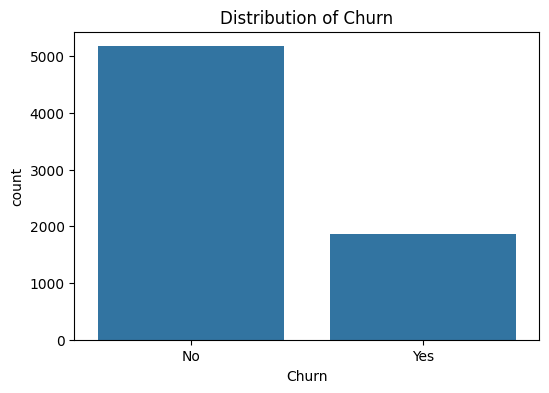

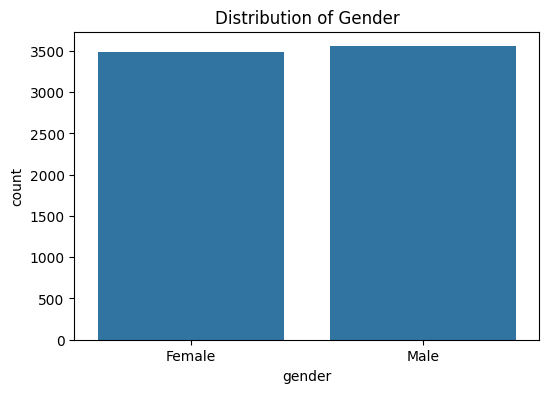

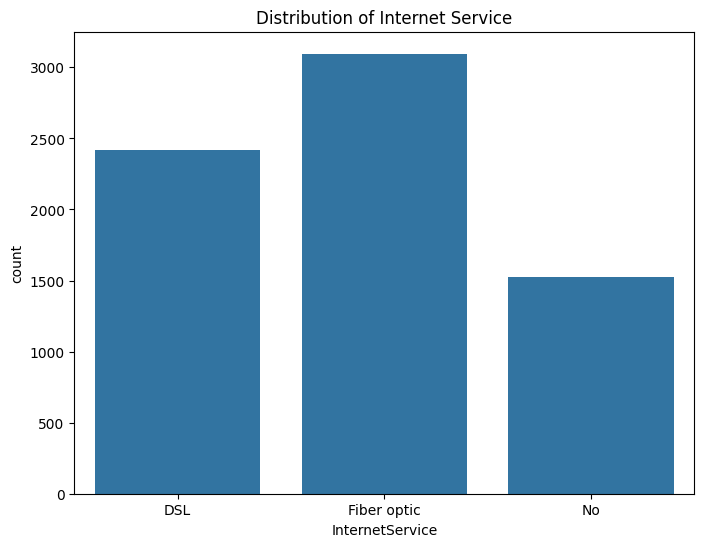

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Distribution of InternetService
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=df)
plt.title('Distribution of Internet Service')
plt.show()


Visualize the relationship between various categorical features and the 'Churn' using countplots to understand which categories have a higher churn rate.

Also, visualize the distribution of numerical features using histograms to identify their patterns and potential outliers.

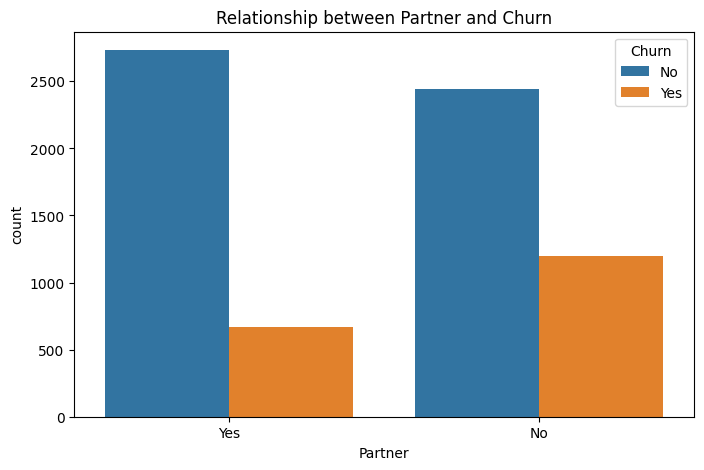

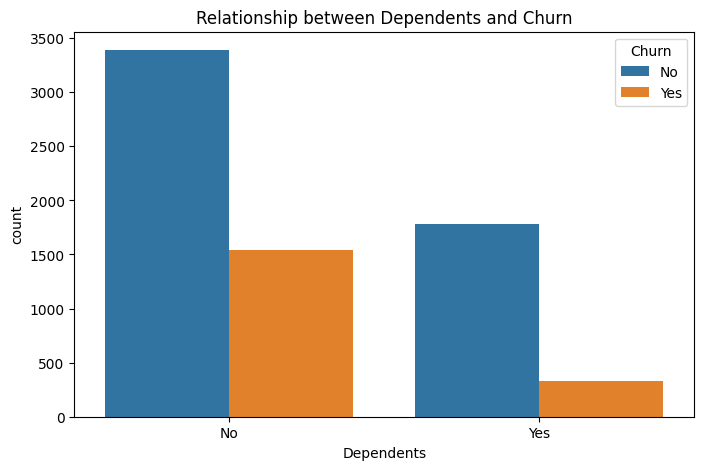

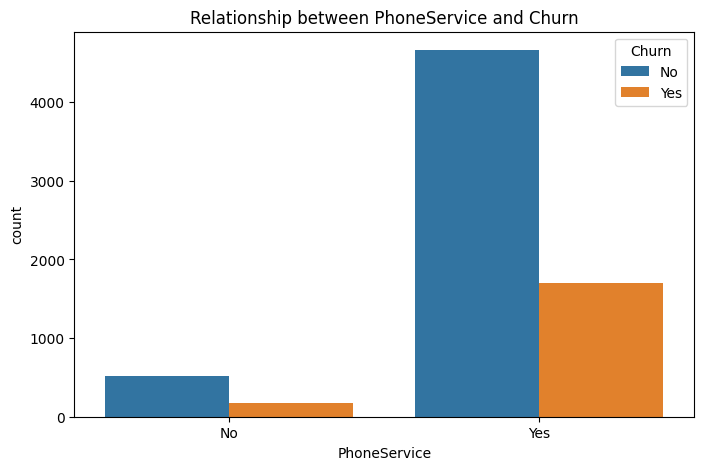

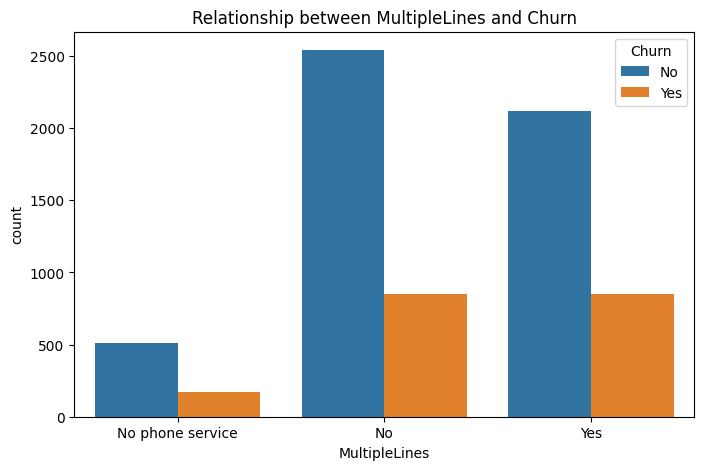

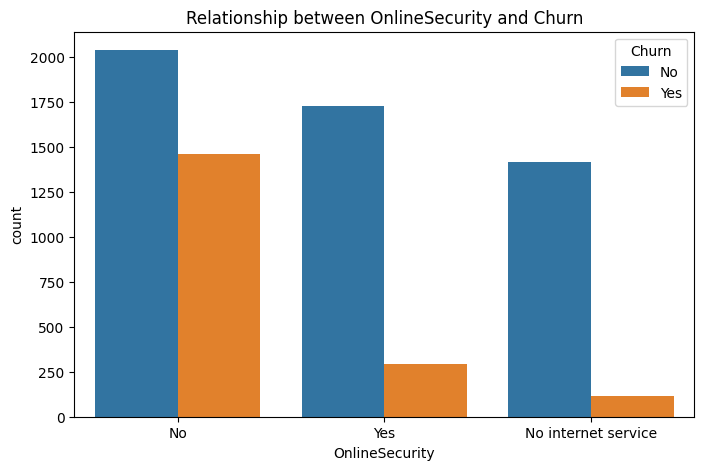

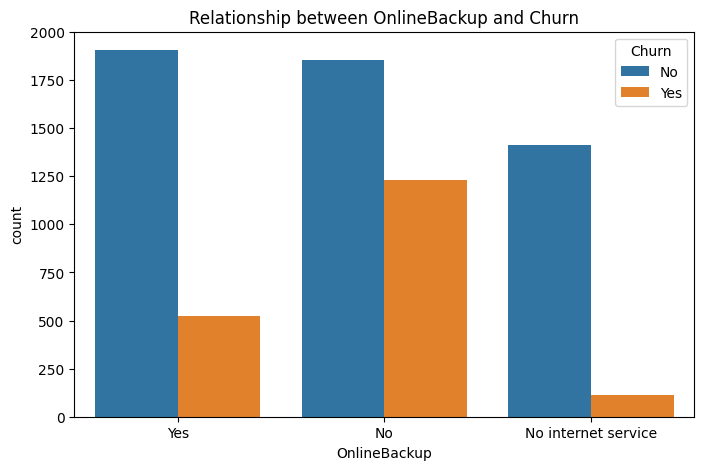

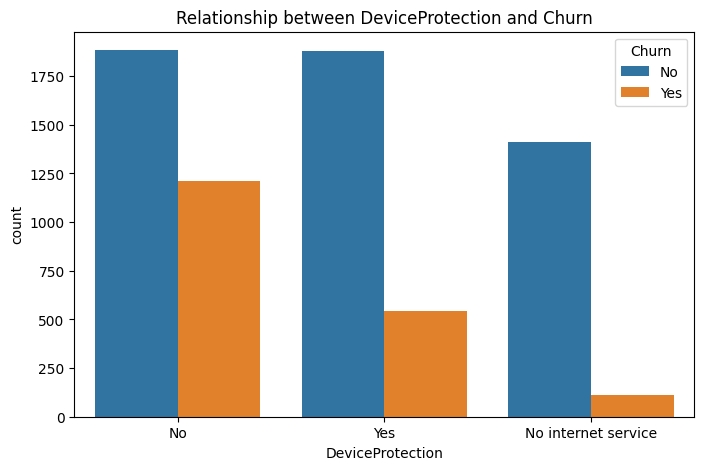

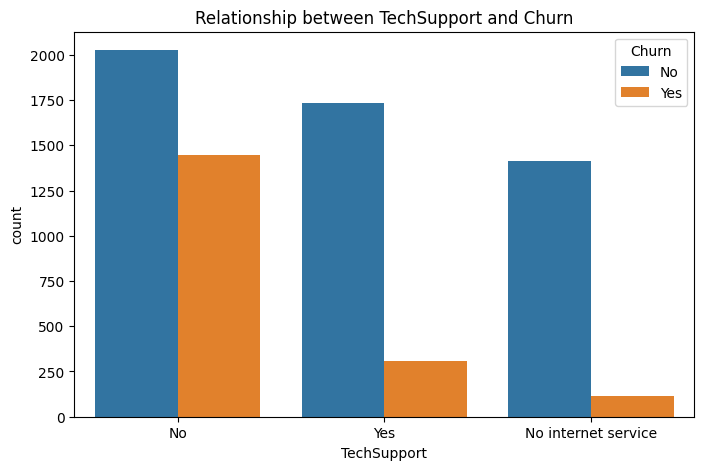

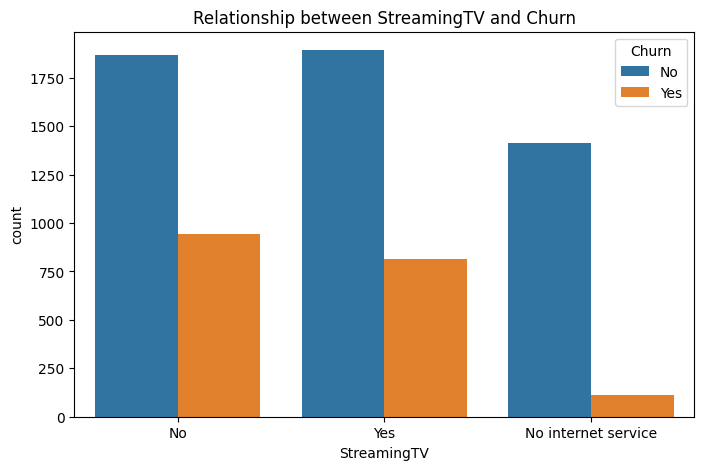

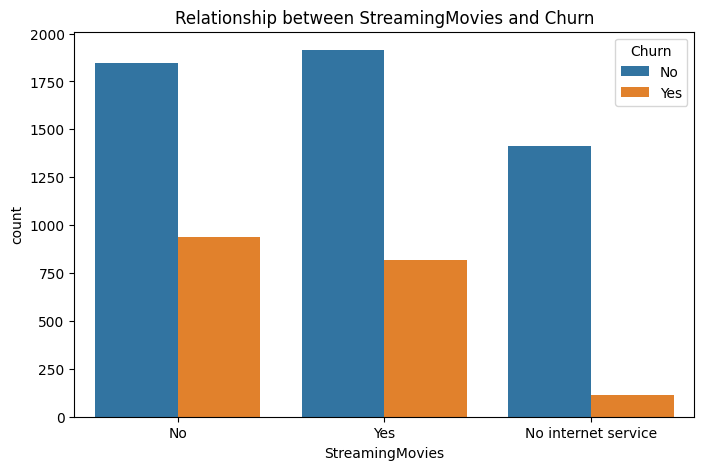

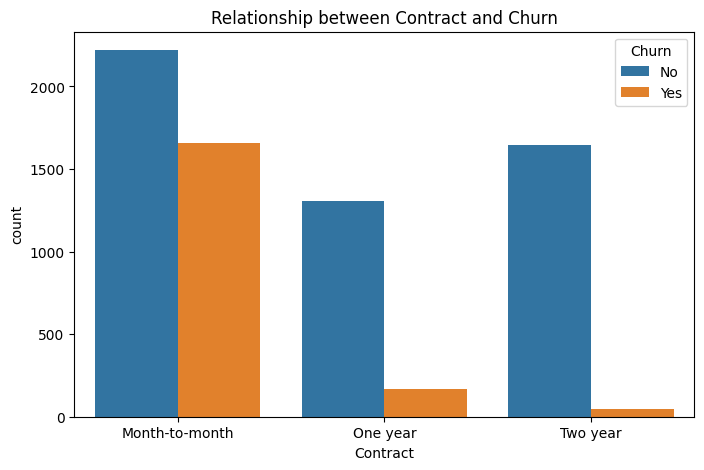

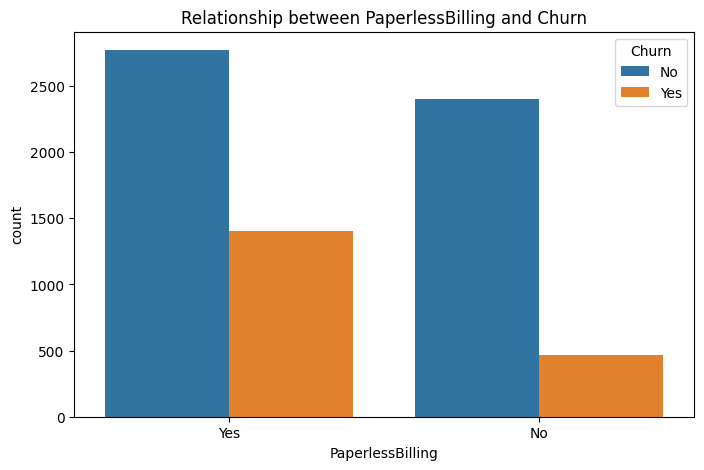

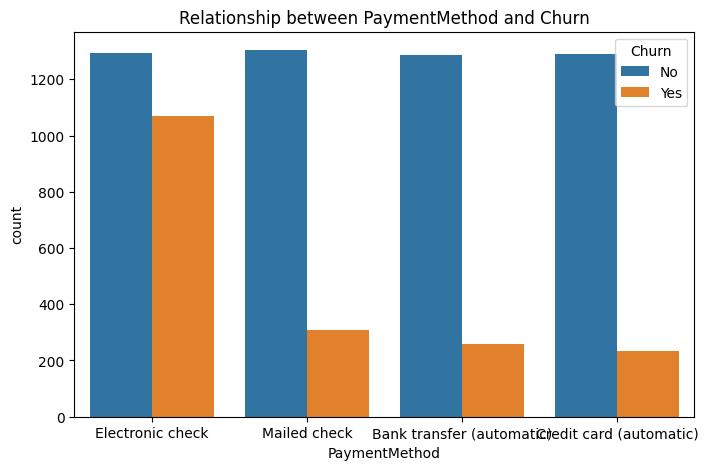

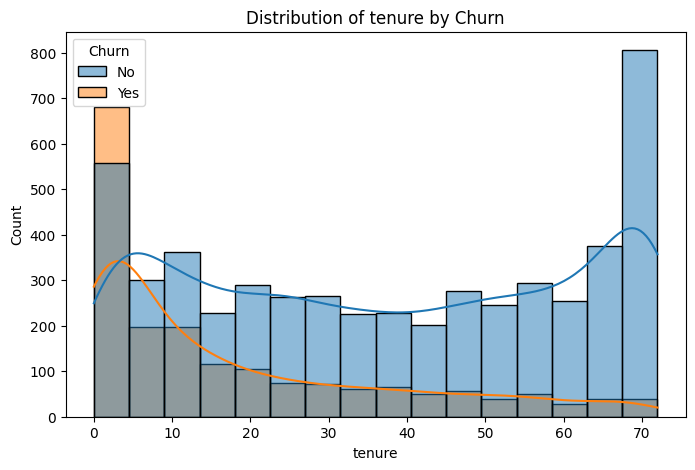

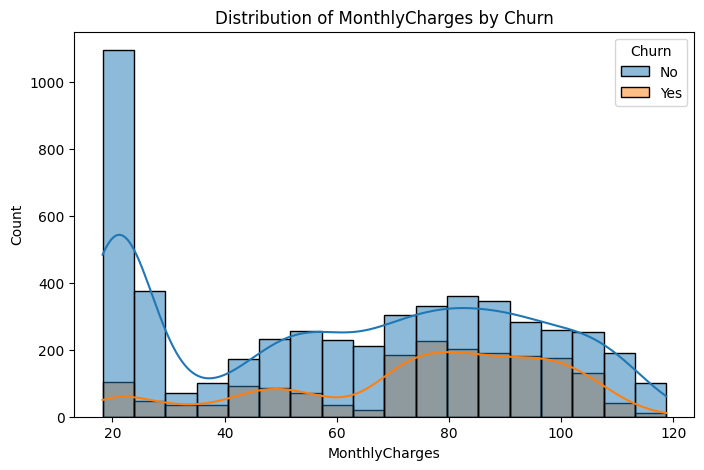

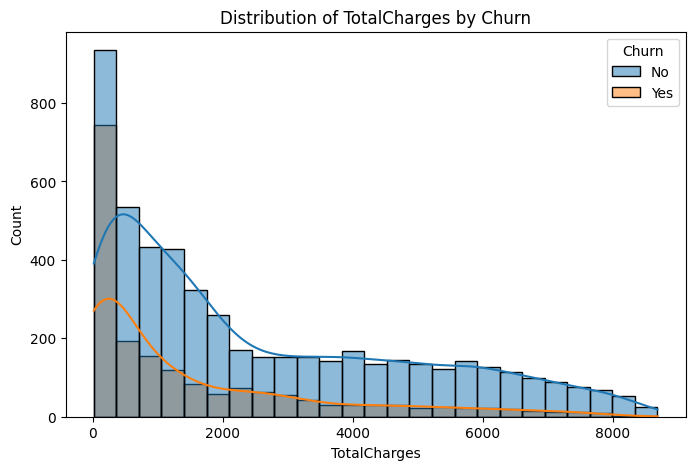

In [8]:
# Relationship between categorical features and Churn
categorical_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Relationship between {feature} and Churn')
    plt.show()

# Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()

## Feature Engineering




Create new features like 'Monthly to Total Charges Ratio' and 'Has Internet' to potentially capture more information and improve model performance.

In [9]:
# Create a new feature: Monthly to Total Charges Ratio
df['Monthly_to_Total_Charges_Ratio'] = df['MonthlyCharges'] / df['TotalCharges']

# Create a new feature: Has Internet
df['HasInternet'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

# Display the first few rows with new features
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Monthly_to_Total_Charges_Ratio,HasInternet
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.000000,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0.030140,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.497920,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.022980,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.466205,1


## Outlier Detection and Handling



Use box plots to visualize the distribution of numerical features and identify outliers.

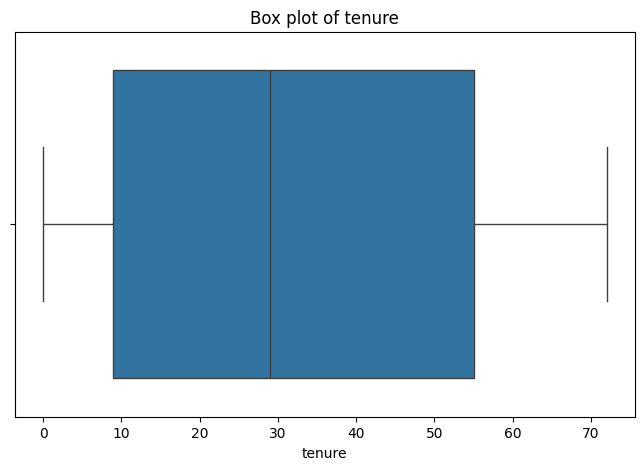

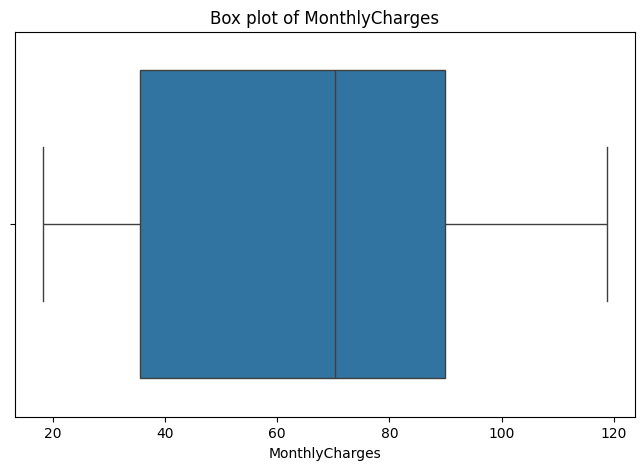

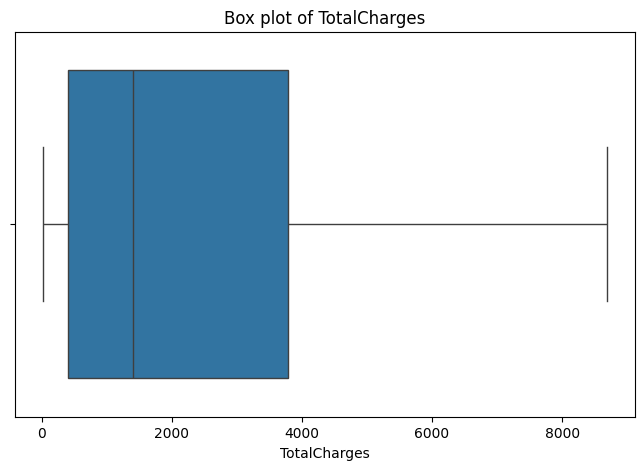

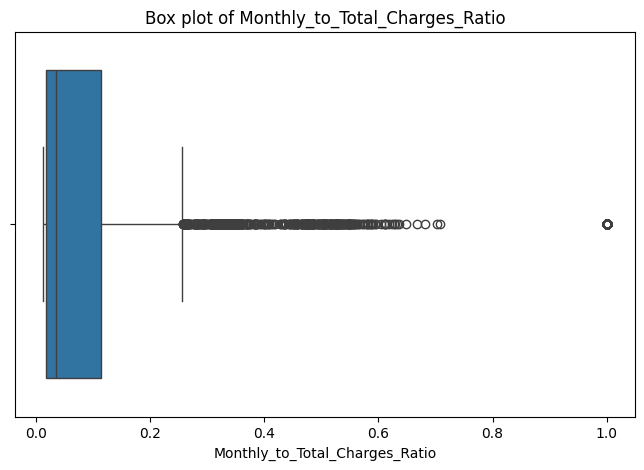

In [10]:
# Visualize outliers using box plots
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Monthly_to_Total_Charges_Ratio']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

## Handling Class Imbalance




Handle the class imbalance in the target variable using oversampling with SMOTE to improve model performance on the minority class.

In [11]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert categorical features to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

# Display the distribution of the target variable after resampling
display(y_train_sampled.value_counts())

,count
Churn,
No,4139
Yes,4139


## Data Preprocessing




Scale numerical features using StandardScaler and encode categorical features using One-Hot Encoding to prepare the data for model training. We will use the resampled training data for fitting the scaler and encoder to avoid data leakage.

In [12]:
from sklearn.preprocessing import StandardScaler

# Identify numerical and categorical features (excluding the target and customerID)
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Monthly_to_Total_Charges_Ratio']
categorical_features = X_train_sampled.select_dtypes(include='bool').columns.tolist()

# Scale numerical features
scaler = StandardScaler()
X_train_sampled[numerical_features] = scaler.fit_transform(X_train_sampled[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the first few rows of the preprocessed training data
display(X_train_sampled.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Monthly_to_Total_Charges_Ratio,HasInternet,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.289835,-0.662262,-0.175158,-0.538546,1,False,False,False,False,...,True,True,False,False,True,False,False,False,True,False
1,0,-0.542950,0.238505,-0.424976,-0.424507,1,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
2,0,-0.626228,-0.963097,-0.679835,-0.413602,1,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,0,-0.084918,0.182859,-0.082492,-0.508216,1,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
4,0,-1.125899,-0.823983,-0.927700,2.511907,1,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False


## Model Selection and Building



Build a simple Deep Learning model to predict churn.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Deep Learning model
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_sampled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Deep Learning model
dl_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

print("Models built successfully.")

Models built successfully.



Build and train Logistic Regression, Random Forest, Decision Tree, and Gradient Boosting models.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Build Logistic Regression model
lg_model = LogisticRegression(random_state=42)

# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Build Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Build Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train Logistic Regression model
lg_model.fit(X_train_sampled, y_train_sampled)

# Train Random Forest model
rf_model.fit(X_train_sampled, y_train_sampled)

# Train Decision Tree model
dt_model.fit(X_train_sampled, y_train_sampled)

# Train Gradient Boosting model
gb_model.fit(X_train_sampled, y_train_sampled)

print("Logistic Regression, Random Forest, Decision Tree, and Gradient Boosting models built and trained successfully.")

Logistic Regression, Random Forest, Decision Tree, and Gradient Boosting models built and trained successfully.


## Model Training and Evaluation



Train the Deep Learning model on the resampled training data and evaluate their performance on the test set using accuracy and a classification report.

In [15]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Convert y_train_resampled to numeric for Deep Learning model
y_train_sampled_numeric = y_train_sampled.apply(lambda x: 1 if x == 'Yes' else 0)

# Train Deep Learning model
history = dl_model.fit(X_train_sampled, y_train_sampled_numeric, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred_dl_prob = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl_prob > 0.5).astype("int64")

# Convert y_test to numeric for classification report
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)


# Evaluate Deep Learning model
dl_accuracy = accuracy_score(y_test_numeric, y_pred_dl)
dl_report = classification_report(y_test_numeric, y_pred_dl)


print("\nDeep Learning Model Evaluation:")
print(f"Accuracy: {dl_accuracy}")
print("Classification Report:")
print(dl_report)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Deep Learning Model Evaluation:
Accuracy: 0.7735982966643009
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1035
           1       0.75      0.22      0.34       374

    accuracy                           0.77      1409
   macro avg       0.76      0.60      0.60      1409
weighted avg       0.77      0.77      0.72      1409



Evaluate the performance of the Logistic Regression, Random Forest, Decision Tree, and Gradient Boosting models using accuracy and a classification report to compare them with the other models.

In [16]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# List of models and their corresponding names
models = [
    ('Logistic Regression', lg_model),
    ('Random Forest', rf_model),
    ('Decision Tree', dt_model),
    ('Gradient Boosting', gb_model)
]

# Convert y_test to numeric for evaluation metrics
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

for model_name, model in models:
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Convert predictions to numeric if they are not already (for consistent evaluation)
    y_pred_numeric = pd.Series(y_pred).apply(lambda x: 1 if x == 'Yes' or x == 1 else 0)

    # Evaluate model
    accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
    precision = precision_score(y_test_numeric, y_pred_numeric, pos_label=1)
    f1_score_val = f1_score(y_test_numeric, y_pred_numeric, pos_label=1)
    recall = recall_score(y_test_numeric, y_pred_numeric, pos_label=1)
    report = classification_report(y_test_numeric, y_pred_numeric)

    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1-Score: {f1_score_val}")
    print(f"Recall: {recall}")
    print("-" * 30) # Separator for clarity
    print("Classification Report:")
    print(report)
    print("-" * 30) # Separator for clarity

Logistic Regression Model Evaluation:
Accuracy: 0.8112136266855926
Precision: 0.6753246753246753
F1-Score: 0.6099706744868035
Recall: 0.5561497326203209
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1035
           1       0.68      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

------------------------------
Random Forest Model Evaluation:
Accuracy: 0.7849538679914834
Precision: 0.6053412462908012
F1-Score: 0.5738396624472574
Recall: 0.5454545454545454
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg    

## Model Comparison

Create a table to compare the performance metrics of all built models.

## Feature Importance




Extract and visualize the feature importance scores from the Random Forest and Gradient Boosting models to understand which features contribute most to the churn prediction.

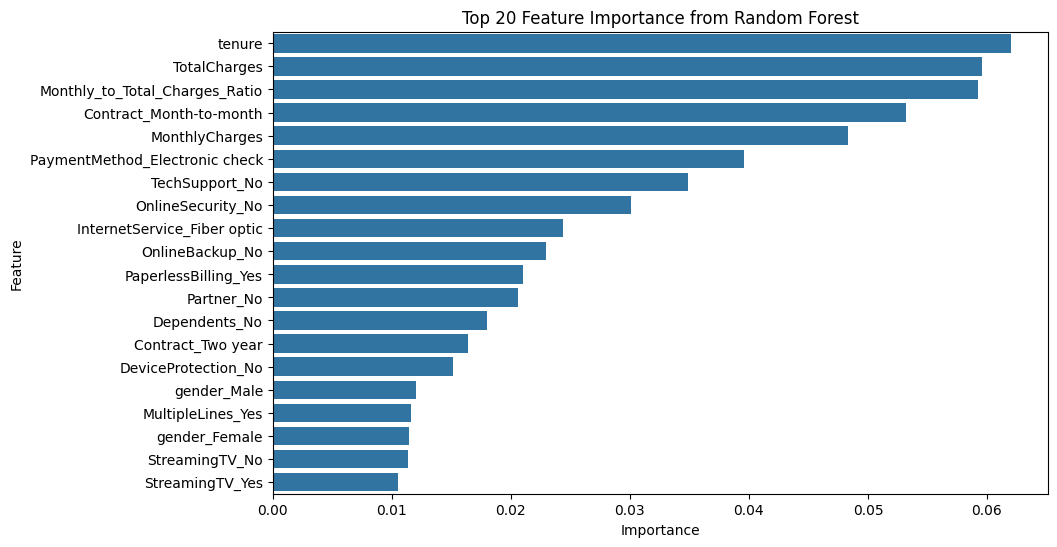

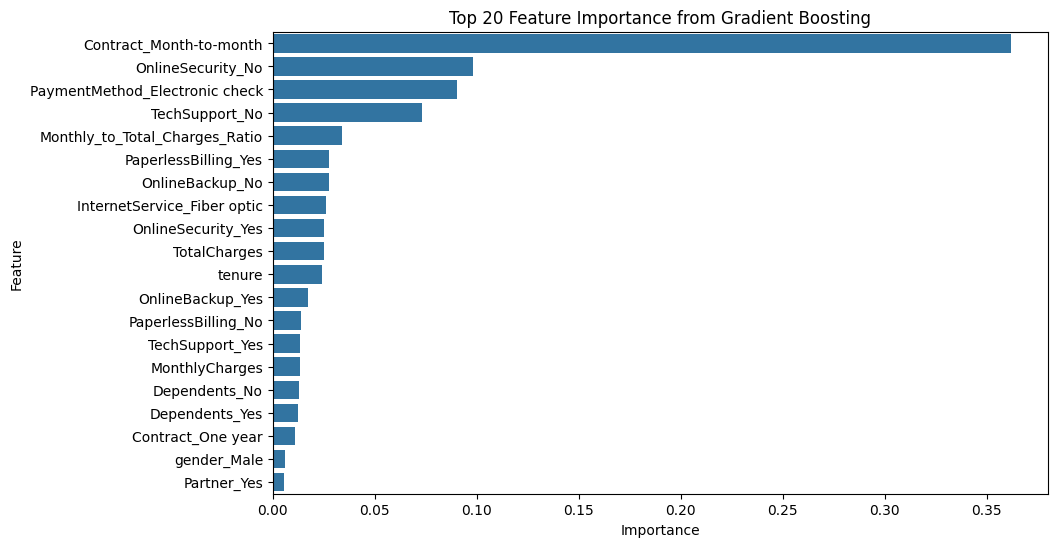

In [20]:
# Get feature importance from Random Forest model
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_sampled.columns).sort_values(ascending=False)

# Visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance[:20], y=rf_feature_importance[:20].index)
plt.title('Top 20 Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Get feature importance from Gradient Boosting model
gb_feature_importance = pd.Series(gb_model.feature_importances_, index=X_train_sampled.columns).sort_values(ascending=False)

# Visualize feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=gb_feature_importance[:20], y=gb_feature_importance[:20].index)
plt.title('Top 20 Feature Importance from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## ROC AUC Curve



Plot the ROC AUC curves for the trained models to evaluate their ability to distinguish between churn and non-churn classes.

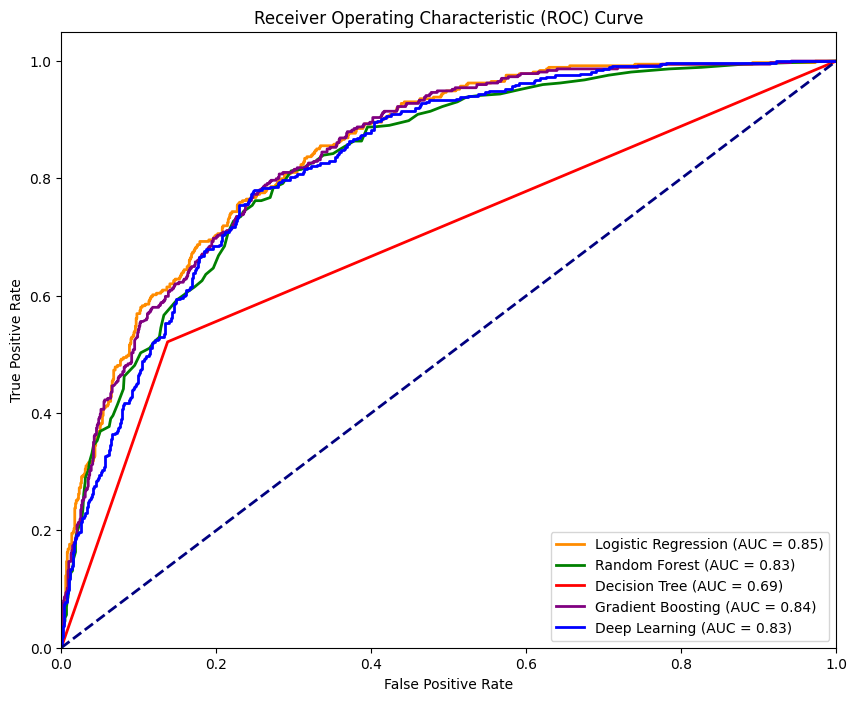

In [22]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (Churn=Yes)
y_pred_log_reg_prob = lg_model.predict_proba(X_test)[:, 1]
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]
y_pred_gb_prob = gb_model.predict_proba(X_test)[:, 1]
# For DL model, we already have probabilities y_pred_dl_prob

# Convert y_test to numeric for ROC curve calculation
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_numeric, y_pred_log_reg_prob)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_numeric, y_pred_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve and AUC for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test_numeric, y_pred_gb_prob)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Calculate ROC curve and AUC for Deep Learning
fpr_dl, tpr_dl, _ = roc_curve(y_test_numeric, y_pred_dl_prob)
roc_auc_dl = auc(fpr_dl, tpr_dl)


# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_dl, tpr_dl, color='blue', lw=2, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Heatmaps





Generate a heatmap of the correlation matrix to visualize the relationships between numerical features.

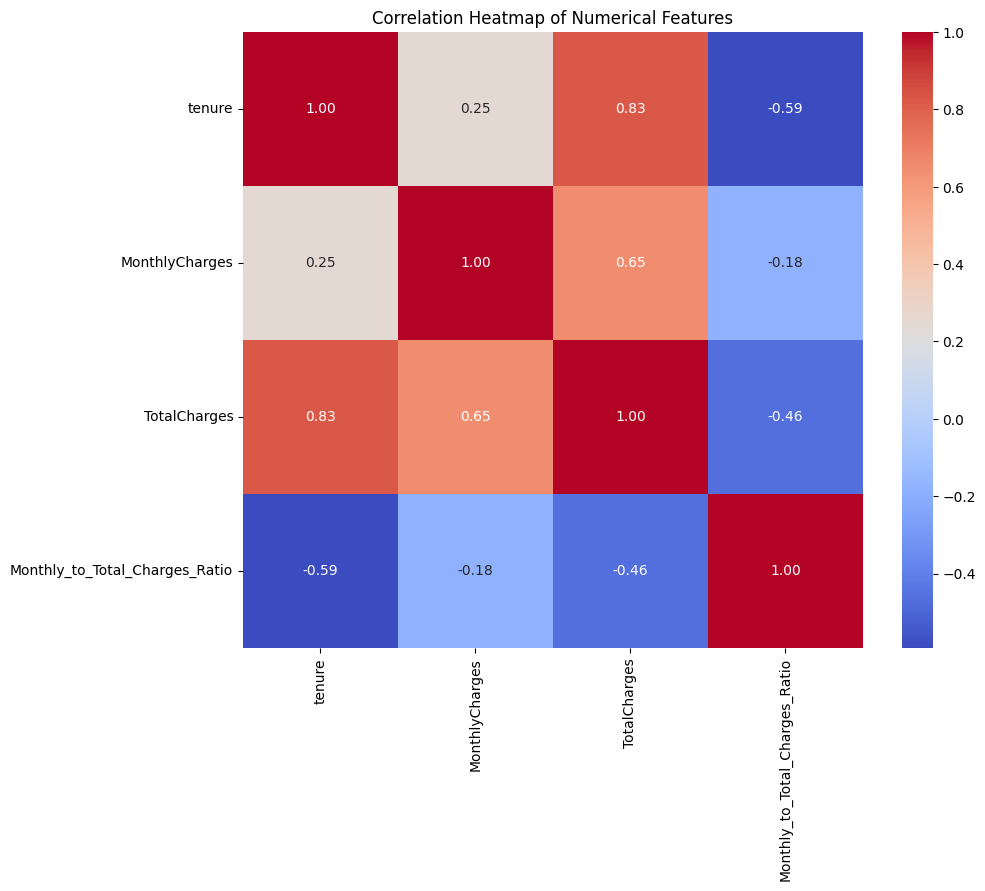

In [23]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Conclusion and Summary of Findings

This project aimed to build a customer churn prediction model using the Telco Customer Churn dataset. The process involved several key steps:

1.  **Data Loading and Initial Inspection**: The dataset was loaded and inspected, revealing a mix of numerical and categorical features and the presence of missing values in the 'TotalCharges' column, which was also incorrectly identified as an object type.

2.  **Data Cleaning**: Missing values in 'TotalCharges' were handled by imputing with the median, and the column was converted to a numeric type.

3.  **Exploratory Data Analysis (EDA)**:
    *   The distribution of the target variable 'Churn' showed an imbalance, with significantly more non-churn customers than churn customers.
    *   Analysis of categorical features revealed potential relationships with churn, such as customers with month-to-month contracts, electronic check payment methods, and certain internet services having higher churn rates.
    *   Histograms of numerical features showed varying distributions, with 'tenure' and 'TotalCharges' being skewed.

4.  **Feature Engineering**: A new feature, 'Monthly\_to\_Total\_Charges\_Ratio', and a binary feature 'HasInternet' were created to potentially capture more predictive information.

5.  **Outlier Detection and Handling**: Box plots were used to visualize outliers in numerical features. While outliers were present, no specific handling was performed in this iteration, but this could be a future area for improvement.

6.  **Handling Class Imbalance**: The class imbalance in the target variable was addressed using SMOTE (Synthetic Minority Over-sampling Technique) on the training data, resulting in a balanced training set.

7.  **Data Preprocessing**: Numerical features were scaled using StandardScaler, and categorical features were encoded using one-hot encoding to prepare the data for model training.

8.  **Model Selection and Building**: Several models were built, including Logistic Regression, a Deep Learning model, Random Forest, Decision Tree, and Gradient Boosting.

9.  **Model Training and Evaluation**: All models were trained on the resampled training data and evaluated on the test set using accuracy and classification reports (Precision, Recall, F1-Score). The performance table provided a comparison of these metrics across models.

10. **Feature Importance**: Feature importance was determined for tree-based models (Random Forest and Gradient Boosting), highlighting the features that contribute most to churn prediction (e.g., 'Contract\_Month-to-month', 'OnlineSecurity\_No', 'PaymentMethod\_Electronic check', 'tenure', 'TotalCharges', 'MonthlyCharges').

11. **ROC AUC Curve**: ROC AUC curves were plotted for all models, providing a visual representation of their ability to discriminate between churn and non-churn classes. The AUC scores provided a quantitative measure of this ability.

12. **Heatmaps**: A heatmap of the correlation matrix for numerical features was generated, showing the relationships between 'tenure', 'MonthlyCharges', 'TotalCharges', and the engineered 'Monthly\_to\_Total\_Charges\_Ratio'. 'tenure' and 'TotalCharges' showed a strong positive correlation.

**Overall Conclusion**:

Based on the evaluation metrics and visualizations, the Gradient Boosting model and Logistic Regression model appear to perform relatively well in terms of F1-score and AUC, indicating a good balance between precision and recall in predicting churn. The Deep Learning model, while showing high precision, had a low recall for the churn class in this initial build. The feature importance analysis provided valuable insights into which factors are most influential in customer churn.

